# 示例

In [1]:
from recommendations import critics

In [2]:
critics['Lisa Rose']['Lady in the Water']

2.5

In [3]:
critics['Toby']['Snakes on a Plane']=4.5

In [4]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 1.0}

# 寻找相近的用户1——欧几里得距离评价

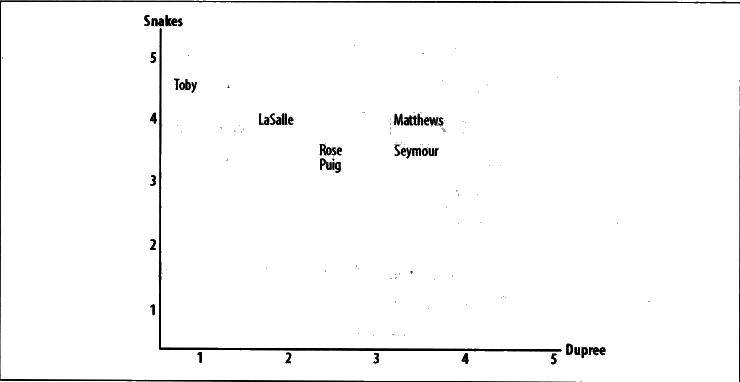

In [10]:
from IPython.display import Image
Image(filename="python.png")

In [6]:
#判断Toby和LaSalle的相似度

In [7]:
from math import sqrt
1/(1+sqrt(pow(4.5-4,2)+pow(1-2,2)))#把tony和alsalle的sankes和dupree评分进行比较，
#得出平方和就是他们的相似距离，＋1做分母是为了避免分母为零。数字越小越相似

0.4721359549995794

In [12]:
#def sim_distance。

In [8]:
#同样的，计算Lisa Rose和Gene Seymour的距离

In [9]:
import recommendations
recommendations.sim_distance(recommendations.critics,'Lisa Rose','Gene Seymour')

0.14814814814814814

# 寻找相近的用户2——皮尔森相关度评价

In [17]:
#判断两组数据与某一直线的拟合程度，用于数据不规范时
#（如影评者对影片的评价总是相对于平均水平偏离很大时）
#注意，皮尔森相关度是基于对物品距离的计算

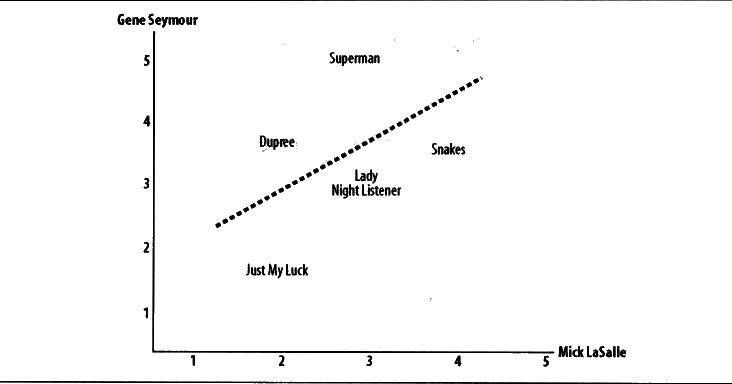

In [13]:
from IPython.display import Image
Image(filename="python2.png")

In [14]:
#上图是相关度不尽相同的情况，而下图是相关度趋于一致的情况

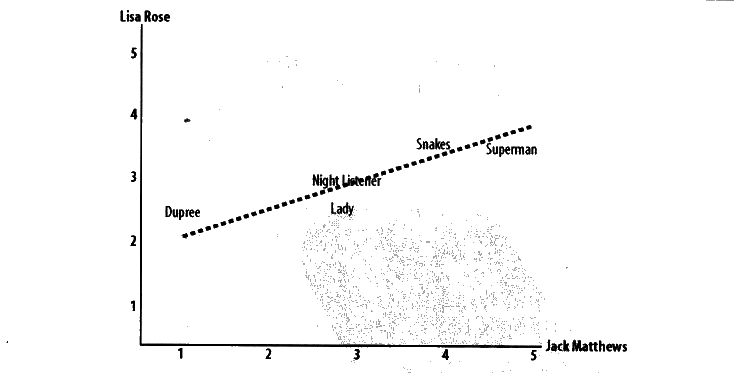

In [15]:
from IPython.display import Image
Image(filename="python3.png")

In [2]:
#这里Jack总是倾向比Lisa给出更高分值，但不影响我们判断他俩有相似偏好(因为他们有趋同性)

In [3]:
#def sim_pearson 判断俩人的相似度

In [19]:
print recommendations.sim_pearson(recommendations.critics,'Lisa Rose','Gene Seymour')

0.396059017191


In [1]:
#而我们日常更常出现的需求是：知道一个人的爱好，向其推荐有共同喜好的人或可能会喜好的物

In [ ]:
#def topMatches

# 找出与某人评分最相似的人

In [ ]:
#找出跟Toby最接近的三个人

In [20]:
import recommendations

In [21]:
recommendations.topMatches(recommendations.critics,'Toby',n=5)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig'),
 (0.66284898035987, 'Jack Matthews'),
 (0.38124642583151164, 'Gene Seymour')]

In [21]:
#那么如何推荐物品？

# 推荐物品

In [ ]:
#比如要为Toby推荐电影，得从他没看过的电影里找吧，对这些没看过的电影，
#用欧几里得距离得出其他人跟Toby的相似度（加权），分别乘以他们对这些电影的评价，得出电影的得分（S.x列），再进行加总
#然而有个情况是某个人没看过某电影，（如Puig没看过Lady），那Lady的总评分不是相对少了吗
#所以我们还要做一个动作是除以有评论的人的相似度之和（Sim.Sum）(相当于减权），就会得到相对公正的结果。

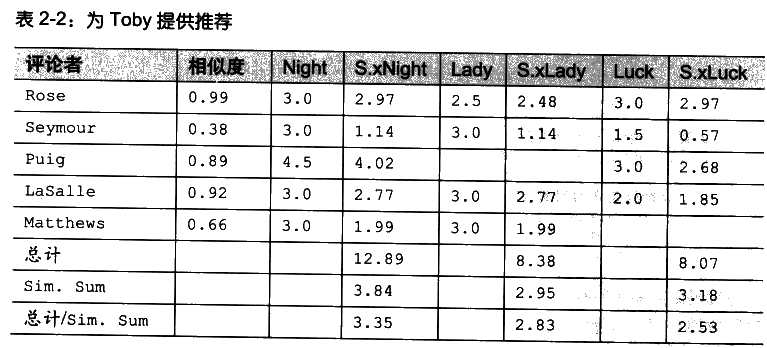

In [22]:
from IPython.display import Image
Image(filename="python4.png")

In [23]:
recommendations.getRecommendations(recommendations.critics,'Toby')

[(3.3477895267131013, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

In [ ]:
#嗯，Toby可能更喜欢'The Night Listener'

In [25]:
recommendations.getRecommendations(recommendations.critics,'Toby',similarity=recommendations.sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

# 以上是基于“人”的推荐，如果我们想知道哪些商品有相似性呢

In [26]:
#只需将人和物进行对调

In [28]:
movies=recommendations.transformPrefs(recommendations.critics)

In [29]:
recommendations.topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [31]:
recommendations.getRecommendations(movies,'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

In [33]:
itemsim=recommendations.calculateSimilarItems(recommendations.critics)

In [34]:
itemsim

{'Just My Luck': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'You, Me and Dupree'),
  (0.15384615384615385, 'The Night Listener'),
  (0.10526315789473684, 'Snakes on a Plane'),
  (0.06451612903225806, 'Superman Returns')],
 'Lady in the Water': [(0.4, 'You, Me and Dupree'),
  (0.2857142857142857, 'The Night Listener'),
  (0.2222222222222222, 'Snakes on a Plane'),
  (0.2222222222222222, 'Just My Luck'),
  (0.09090909090909091, 'Superman Returns')],
 'Snakes on a Plane': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'The Night Listener'),
  (0.16666666666666666, 'Superman Returns'),
  (0.10526315789473684, 'Just My Luck'),
  (0.05128205128205128, 'You, Me and Dupree')],
 'Superman Returns': [(0.16666666666666666, 'Snakes on a Plane'),
  (0.10256410256410256, 'The Night Listener'),
  (0.09090909090909091, 'Lady in the Water'),
  (0.06451612903225806, 'Just My Luck'),
  (0.05333333333333334, 'You, Me and Dupree')],
 'The Night Listener': [(0.28

In [37]:
#给Toby提供一个新的推荐结果

In [36]:
recommendations.getRecommendedItems(recommendations.critics,itemsim,'Toby')

[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

# 从这里开始是movielens的演示

In [10]:
import recommendations

In [38]:
prefs=recommendations.loadMovieLens()

In [39]:
prefs['87']

{'2001: A Space Odyssey (1968)': 5.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Addams Family Values (1993)': 2.0,
 'Addicted to Love (1997)': 4.0,
 'Adventures of Priscilla, Queen of the Desert, The (1994)': 3.0,
 'Adventures of Robin Hood, The (1938)': 5.0,
 'Air Force One (1997)': 3.0,
 'Air Up There, The (1994)': 3.0,
 'Alien (1979)': 4.0,
 'American President, The (1995)': 5.0,
 'Annie Hall (1977)': 4.0,
 'Apocalypse Now (1979)': 4.0,
 'Babe (1995)': 5.0,
 'Baby-Sitters Club, The (1995)': 2.0,
 'Back to the Future (1985)': 5.0,
 'Bad Boys (1995)': 4.0,
 'Bananas (1971)': 5.0,
 'Barcelona (1994)': 3.0,
 'Batman & Robin (1997)': 4.0,
 'Batman (1989)': 3.0,
 'Batman Returns (1992)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Big Squeeze, The (1996)': 2.0,
 'Birdcage, The (1996)': 4.0,
 'Blade Runner (1982)': 4.0,
 'Blues Brothers, The (1980)': 5.0,
 'Boomerang (1992)': 3.0,
 'Boot, Das (1981)': 4.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Braveheart (1995)': 4.0,
 'Bridge on the River

In [40]:
recommendations.getRecommendations(prefs,'87')[0:30]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Boys, Les (1997)'),
 (4.89884443128923, 'Legal Deceit (1997)'),
 (4.815019082242709, 'Letter From Death Row, A (1998)'),
 (4.7321082983941425, 'Hearts and Minds (1996)'),
 (4.696244466490867, 'Pather Panchali (1955)'),
 (4.652397061026758, 'Lamerica (1994)'),
 (4.538723693474813, 'Leading Man, The (1996)'),
 (4.535081339106103, 'Mrs. Dalloway (1997)'),
 (4.532337612572981, 'Innocents, The (1961)'),
 (4.527998574747079, 'Casablanca (1942)'),
 (4.510270149719864, 'Everest (1998)'),
 (4.493967755428439, 'Dangerous Beauty (1998)'),
 (4.485151301801342, 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (4.463287461290222, 'Wrong Trousers, The (1993)'),
 (4.450979436941

In [41]:
itemsim=recommendations.calculateSimilarItems(prefs,n=50)

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


In [42]:
recommendations.getRecommendedItems(prefs,itemsim,'87')[0:30]

[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Scream (1996)'),
 (5.0, 'Rumble in the Bronx (1995)'),
 (5.0, 'Rock, The (1996)'),
 (5.0, 'Robin Hood: Prince of Thieves (1991)'),
 (5.0, 'Reservoir Dogs (1992)'),
 (5.0, 'Police Story 4: Project S (Chao ji ji hua) (1993)'),
 (5.0, 'House of the Spirits, The (1993)'),
 (5.0, 'Fresh (1994)'),
 (5.0, 'Denise Calls Up (1995)'),
 (5.0, 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'),
 (5.0, 'Before the Rain (Pred dozhdot) (1994)'),
 (5.0, 'Assignment, The (1997)'),
 (5.0, '1-900 (1994)'),
 (4.875, "Ed's Next Move (1996)"),
 (4.833333333333333, 'Anna (1996)'),
 (4.8, 'Dark City 